<a href="https://colab.research.google.com/github/deltorobarba/sciences/blob/master/machinelearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="blue">**Machine Learning**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_1000.png)

Video: [Attention in Transformers](https://youtu.be/eMlx5fFNoYc?si=C7mPpdqouDtZpDN5)

Formal Aspects of Language Modeling
Ryan Cotterell, Anej Svete, Clara Meister, Tianyu Liu and Li Du
Thursday 9th November, 2023

##### <font color="blue">*Foundation Model*

A foundation model development cheatsheet, from foundation model developers.

The folks over at EleutherAI, in collaboration with MIT, AI2, HuggingFace, Stanford, Princeton, and more, have released the foundation model development cheatsheet, a quick-start guide to familiarize new developers with useful tools and resources for developing new open models.

You can use it to easily find, for example, pre-training data sources, tools and frameworks for data preparation, model training, model evaluation, and more.

This is a great initiative aligned with EleutherAI's mission to lower barriers to entry of research and development of foundation models.

Cheat sheet (interactive): https://fmcheatsheet.org/
Github repo: https://lnkd.in/dSDkbY-K
Paper: https://lnkd.in/d5DRns4i
Blog: https://lnkd.in/dg4drU_3

##### <font color="blue">*Finetune LLMs*

The mixer of Experts(MOE) — Modern architecture for divide and concur learning

https://medium.com/@sthanikamsanthosh1994/the-mixer-of-experts-moe-modern-architecture-for-divide-and-concur-learning-dbe10ffa8436

###### *Overview*

![sciences](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_1704.png)

*Finetuning LLMs*

* Supervised
* RLHF
* Distillation
* deprecated: Parameter-Efficient Fine-Tuning using PEFT: https://arxiv.org/abs/2312.12148
* pending (?): Lora and QLora

https://www.analyticsvidhya.com/blog/2023/08/fine-tuning-large-language-models/

https://www.deeplearning.ai/short-courses/finetuning-large-language-models/

###### <font color="orange">*Parameter efficient Turning (PEFT)*

https://cloud.google.com/vertex-ai/docs/generative-ai/models/tune-text-models-supervised

* This is a good primer go/parameter-efficient-tuning-primer
* what I didn't get very well is why the candidate related int-8 with LoRA tuning
* for hosting on CPU
* I think the candidate mixed-up things
* LoRA tuning is to do fine-tuning efficiently by just changing some of the weights inside the model. The amount of weights to change is decided by its rank, currently in Vertex we only offer rank 1, but this is hidden. OpenAI offers a way larger rank, and it's more powerful
* there's QLoRA as well for quantized models.
* What actually reduces memory is quantization, and there you can go to int-8 and host it inCPU if the model permits it
* In fact, gemini-pro and bison@002 are quantized
* obviously as these are bigs the quantization still requires a good amount of TPUs 😀


###### $\hookrightarrow$ *Prompt Engineering (incl. Chain-of-Thoughts - CoT)*

https://ploomber.io/blog/prompt-engineering-techniques/

https://arxiv.org/abs/2401.14423 Prompt Design and Engineering: Introduction and Advanced Methods

Prompt Engineering: Längere "Chain of Thoughts" verbessern die Leistung von Sprachmodellen

https://the-decoder.de/prompt-engineering-laengere-chain-of-thoughts-verbessern-die-leistung-von-sprachmodellen/

###### $\hookrightarrow$ *Low-Rank Adaptation (Lora and qLora)*

Just wrote a new article on "Improving LoRA: Implementing Weight-Decomposed Low-Rank Adaptation (DoRA) from Scratch": https://magazine.sebastianraschka.com/p/lora-and-dora-from-scratch


qLora and Lora to move from floating to integers in models (can damage a bit performance but still acceptable), but we can use then CPUs to train some of these models instead of only GPUs.

can one use qLora and Lora to move from floating to integers in LLM models in order to use CPUs to train LLMs instead of only GPUs.

Yes, qLora and Lora are techniques that can potentially enable the use of CPUs for training large language models (LLMs) by moving from floating-point to integer representations. Here's a breakdown of how this works and the considerations involved:

**Traditional LLM Training and GPUs**

* **Floating-point precision:** LLMs are typically trained using floating-point numbers (e.g., float32) because they offer a wide dynamic range necessary to represent the subtle gradients and relationships between parameters during the learning process.
* **GPU advantage:** GPUs are highly optimized for parallel computations involving floating-point numbers. This makes them significantly faster than CPUs for traditional LLM training.

**qLora and Lora for CPU Training**

* **Quantization:** qLora (quantized Lora) is a method for reducing the precision of LLM parameters. Instead of storing them as full 32-bit floating-point numbers, it's possible to represent them using lower-precision integers (e.g., 8-bit integers). This drastically reduces memory footprint and computational cost.
* **Lora:** Lora (Low-Rank Adaptation) is a technique that decomposes weight matrices in LLMs into smaller, more manageable components. This decomposition can then be exploited during quantization for efficiency.
* **CPU efficiency:**  By reducing the memory and computational requirements through quantization, it becomes feasible to train, or at least perform inference of, LLMs on CPUs, which are more generally available and cost-effective than GPUs in many scenarios.

**Challenges and Considerations**

* **Accuracy trade-off:** Quantization generally leads to a slight loss in model accuracy compared to full-precision floating-point representations. The goal is to find the right balance between quantization level and acceptable performance.
* **Optimization:** Techniques like qLora and Lora are relatively new, and ongoing research is focused on making them more efficient and minimizing the accuracy loss.
* **Deployment:**  If you aim to deploy a quantized LLM on CPUs,  you'll likely need specialized software and hardware support to ensure optimal performance.

**In Conclusion**

qLora and Lora offer a promising path towards making LLM training and inference more accessible by potentially allowing the use of CPUs. However, it's essential to be aware of the potential accuracy trade-offs and the fact that this field is still under active development.

**Let me know if you'd like more details on any specific aspect or have another related question!**


*Lora*

"𝗟𝗼𝗥𝗔, which stands for Low-Rank Adaptation, is a popular technique to finetune #llms more efficiently. Instead of adjusting all the parameters of a deep neural network, LoRA focuses on updating only a small set of low-rank matrices."

https://lightning.ai/lightning-ai/studios/code-lora-from-scratch?utm_source=tldrai

  * LoRA: Low-Rank Adaptation of Large Language Models
  * Edward J. Hu*, Yelong Shen*, Phillip Wallis, Zeyuan Allen-Zhu, Yuanzhi Li, Shean Wang, Lu Wang, Weizhu Chen
  * Paper: https://arxiv.org/abs/2106.09685
  * Video explainer: https://www.youtube.com/watch?v=DhRoTONcyZE
  * https://github.com/microsoft/LoRA

###### $\hookrightarrow$ *Dora*

While everyone is talking about Sora, there's a potential successor to LoRA (low-rank adaptation) called DoRA. Here's a closer look at the "DoRA: Weight-Decomposed Low-Rank Adaptation" paper: https://arxiv.org/abs/2402.09353
LoRA is probably the most widely used parameter-efficient finetuning method for LLMs and vision transformers, and DoRA can be seen as an improvement or extension of LoRA that is built on top of it.

A brief LoRA recap: Assuming we have pretrained model weights W, LoRA uses low-rank matrices to approximate weight changes ΔW. I.e., in regular finetuning we have W' = W + ΔW, and in LoRA, we approximate ΔW with BA.

Now, the DoRA method first decomposes the pretrained weight matrix into a magnitude vector (m) and a directional matrix (V). Then, it takes the directional matrix V and applies standard LoRA to it, i.e., W' = m (V + ΔV)/norm = m (W + BA)/norm.

The motivation for developing this method is based on analyzing and comparing the LoRA and full finetuning learning patterns. They found that LoRA either increases or decreases magnitude and direction updates proportionally but seems to lack the capability of making only subtle directional changes as found in full finetuning. Hence, the researchers propose the decoupling of magnitude and directional components. In other words, their DoRA method aims to apply LoRA only to the directional component (while also allowing the magnitude component to be trained separably.)

Note that introducing the magnitude vector m in DoRA adds 0.01% more parameters than standard LoRA. However, across both LLM and vision transformer benchmarks, they found that DoRA even outperforms LoRA if the DoRA rank is halved, i.e., when DoRA only uses half the parameters of regular LoRA.

Overall, I am actually quite impressed by the results and need to toy with this method in practice. It should not be too big of a lift to upgrade a LoRA implementation to DoRA.

###### $\hookrightarrow$ (?) *Proxy-tuning*

*Proxy-tuning*

Proxy-tuning is a way to adapt LLMs without changing the model's weights. This is especially attractive if a given LLM is too resource-intensive to train or if a user doesn't have access to the LLM's weights.
Following up on the proxy-tuning paper discussion from last week, I implemented it in code and gave it a try. It actually works!

In a nutshell, it works like this:

1. Select a base LLM (e.g., an untuned 7B Llama 2 model) smaller and cheaper than the target LLM (e.g., a 10x larger, untuned 70B Llama 2 model).

2. Finetune this smaller base LLM to obtain a small finetuned LLM (e.g., instruction-finetune a 7B Llama 2 model to get a finetuned 7B model).

3. Compute the output difference between the base model (step 1) and the tuned model (step 2).

4. Add this difference in outputs to the target LLM's outputs.

5. Normalize the modified outputs from step 4, and then generate the answer.

I tried the following query:

"If I have 5 apples and eat 2, but then find 3 more on my way home, how many do I have?"

The proxy-tuned model was indeed able to answer correctly, whereas the base models failed: "You start with 5 apples and eat 2, so you have 5 - 2 = 3 apples left. Then, you find 3 more apples on your way home, so you have 3 + 3 = 6 apples in total."

Using the same approach, it was also possible to give Llama 2 13B coding abilities via CodeLlama 7B.

More details and code in my write-up and associated code Studio:

https://lightning.ai/lightning-ai/studios/improve-llms-with-proxy-tuning?view=public

While proxy-tuning and prompting have connections and some potential overlap, they are not precisely the same approach. Here's a breakdown of the differences and where they might intersect:

**Proxy-Tuning**

* **Core Focus:** Parameter-efficient fine-tuning of large language models (LLMs). The goal is to adapt a pre-trained LLM to a new task without fully fine-tuning its vast number of parameters.
* **Mechanism:** Introduces a small set of learnable "proxy" parameters. These might be:
    * Additional vectors that learn relationships between input embeddings.
    * Small adapter modules placed between layers of the LLM.
* **Advantage:** Reduces computational cost and memory footprint of fine-tuning compared to training the entire LLM.

**Prompting**

* **Core Focus:** Eliciting a desired response or behavior from an LLM by carefully crafting the input text.  Prompts include instructions, examples, or textual structures that guide the model's generation.
* **Mechanism:** No internal model parameters are directly modified.  Prompts guide the LLM to use its pre-existing knowledge and abilities to complete the task.
* **Advantage:** Highly flexible and can be applied to a wide range of tasks without fine-tuning.

**Connections and Overlaps**

* **Semantic Tuning:**  Proxy-tuning could be employed with  prompts that have rich semantic representations. This fine-tuning could refine the proxy parameters to better  align with complex queries or instructions provided in the prompts.
* **Prompt Design as Lightweight Fine-tuning:** Sometimes,  prompting involves finding prompts that essentially 'trick' the LLM into performing a task it  wasn't explicitly trained for.  This fine-grained task adaptation through crafting prompts can have a similar spirit to proxy-tuning, in the sense that both aim to modify how the LLM behaves without major internal changes.

**In Summary**

Proxy-tuning and prompting are distinct but complementary techniques. Proxy-tuning focuses on efficient internal parameter modification of LLMs. Prompting focuses on steering model output through clever input design.  There could be interesting potential in the use of these two approaches together.

###### <font color="orange">*Adapter Tuning*

https://cloud.google.com/vertex-ai/docs/generative-ai/models/tune-models

https://services.google.com/fh/files/misc/adaptation_of_foundation_models_whitepaper_google_cloud.pdf

https://magazine.sebastianraschka.com/p/finetuning-llms-with-adapters

https://arxiv.org/abs/2106.03164 On the Effectiveness of Adapter-based Tuning for Pretrained Language Model Adaptation

Here's a breakdown of Adapter Tuning, its advantages, and how it works:

**What is Adapter Tuning?**

Adapter tuning is a technique used to fine-tune large language models (LLMs) for new tasks more efficiently. Here's the core idea:

* **Pre-trained Models:** Large language models have been trained on vast amounts of text data, giving them a deep understanding of language patterns.
* **Bottleneck:** Fine-tuning these massive models to a specific task (like question answering or translation) often means updating millions or billions of parameters, which is computationally expensive and time-consuming.
* **Adapters to the Rescue:** Adapter tuning introduces compact "adapter" modules (small sets of new neural network layers) within the pre-trained model's architecture.  Instead of updating the entire model, only the parameters within these adapters are trained for the new task.

**Advantages of Adapter Tuning**

* **Efficiency:** Adapter tuning greatly reduces the number of parameters needing updates, making fine-tuning significantly faster and less computationally demanding.
* **Preserving Knowledge:** By freezing most of the original model's weights, adapter tuning preserves the language knowledge the model has acquired during pre-training.
* **Multi-Task Learning:** A single pre-trained model can have multiple adapters, each trained for a different task. This allows the model to switch between tasks easily without needing to retrain the entire model.

**How Adapter Tuning Works**

1. **Pre-trained Model:** Start with a large, pre-trained language model.
2. **Insert Adapters:** Add small adapter modules (new layers) between existing layers of the pre-trained model.
3. **Freeze the Original Model:** Keep the weights of the pre-trained model frozen.
4. **Train the Adapters:** Train only the parameters of the newly added adapters on the data for the specific task at hand.

**In Summary**

Adapter tuning is a clever way to fine-tune large language models. It saves time and computing resources, maintains the model's core knowledge, and facilitates efficient multi-task capabilities.

**Let me know if you'd like a more technical explanation or examples of how adapter tuning is used!**


###### *ASPIRE*

https://blog.research.google/2024/01/introducing-aspire-for-selective.html

Yes! "Adaptation with Self-Evaluation to Improve Selective Prediction in LLMs" (ASPIRE) is primarily a framework for finetuning LLMs. Here's why:

**Focus of ASPIRE:**

* **Selective Prediction:**  ASPIRE aims to teach LLMs to evaluate their own output and decide whether to provide an answer or abstain ("I don't know"). This aligns with finetuning goals of improving model behavior rather than directly changing its architecture.
* **Self-Evaluation:** The framework trains the LLM on target-task data to learn to assess its own predictions, rather than relying on external retrieval mechanisms.

**How ASPIRE Finetunes LLMs:**

ASPIRE involves finetuning a pre-trained LLM on a portion of question-answering datasets like CoQA. During finetuning, the model learns to output both an answer and a selection score. The selection score indicates the model's confidence in its answer.  This approach directly modifies the LLM's output behavior, aligning with finetuning.

**Difference from RAG:**

RAG (Retrieval-Augmented Generation) frameworks enhance LLMs by teaching them to retrieve relevant information from external sources during answer generation.  ASPIRE, in contrast, focuses on internal self-assessment.

**ASPIRE vs. RLHF:**

While both ASPIRE and RLHF (Reinforcement Learning from Human Feedback) aim to improve the quality and reliability of LLM responses, they differ in approach:

* **RLHF:** Uses human feedback to directly reward desirable responses and penalize undesirable ones.
* **ASPIRE:** Focuses on the LLM learning to evaluate itself based on data.

**In conclusion, ASPIRE falls firmly within the domain of finetuning LLMs by teaching them the crucial skill of selective prediction.**


###### <font color="orange">*RHLF*

https://cloud.google.com/blog/products/ai-machine-learning/rlhf-on-google-cloud?hl=en

https://cloud.google.com/vertex-ai/docs/generative-ai/models/tune-text-models-rlhf

**RLHF stands for "Reinforcement Learning from Human Feedback"**

* is a crucial technique for improving the performance and alignment of these models. It involves a combination of methods that leverage human feedback to refine and guide the learning process of the model.

* Here's how RLHF is applied to LLMs:

1. **Supervised Fine-Tuning (SFT)**: Initially, the language model is trained on a large dataset of text from the internet. This phase is purely supervised learning, where the model learns to predict the next word in a sequence. However, this dataset might not perfectly represent desirable outputs, as it contains a wide range of materials, including low-quality or harmful content.

2. **Reward Modeling**: After the initial training, human reviewers assess the outputs of the model, providing feedback on its responses. This feedback could be in the form of rankings, ratings, or direct corrections. This human feedback is then used to create a reward model. The reward model essentially predicts how a human would rate a given output, serving as a proxy for human judgment.

3. **Proximal Policy Optimization (PPO)**: With the reward model in place, the LLM is further trained using reinforcement learning, specifically a method called Proximal Policy Optimization. In this phase, the model learns to generate outputs that are more likely to receive higher ratings from the reward model. This step is crucial for aligning the model's outputs with human values and preferences.

4. **Iterative Refinement**: The process can be iterative, with further rounds of human feedback and model refinement. This ongoing interaction helps in continuously improving the quality and relevance of the model's responses, ensuring they align well with ethical guidelines, factual accuracy, and user expectations.

Applying RLHF to LLMs is important for several reasons:

- **Alignment with Human Values**: It helps ensure that the model's outputs are aligned with human ethical standards and societal norms.
- **Reduction of Harmful Outputs**: By training the model with human feedback, it's possible to reduce the likelihood of generating unsafe, biased, or otherwise undesirable content.
- **Enhanced Relevance and Utility**: Feedback-driven training can make the model more useful and relevant to users by focusing on generating high-quality, contextually appropriate responses.

This approach represents a significant advancement in the development of more responsible and effective AI language models.

###### *Direct Preference Optimization (DPO)*

**Direct Preference Optimization (DPO)**

Interesting article from Andrew Ng about a new research paper that proposes DPO (direct preference optimization) over RLHF. A promise is that you won‘t need to deal with a separately represented reward function -- you just need the LLM transformer -- and you can train the LLM directly and more efficiently to optimize the same objective as RLHF. Enjoy the read 🤓🙌

https://www.deeplearning.ai/the-batch/issue-231/

https://browse.arxiv.org/html/2305.18290v2

https://magazine.sebastianraschka.com/p/10-ai-research-papers-2023

and here his thoughts more ind details in case you dont want to read the paper: https://magazine.sebastianraschka.com/p/llm-training-rlhf-and-its-alternatives


Direct Preference Optimization (DPO) is pretty amazing. Surely, it can't be this straightforward to replace the whole reinforcement learning on human feedback (RLHF) phase?
1. Treat a foundational (or instruction tuned) LLM
as the reference LLM
1.    Generate pairs of outputs to prompts and have humans choose which one they like (human feedback)
2.    Add a linear layer to the LLM so that it outputs a scalar value, and tune this new model with a new loss function (compute log-ratio of scalar outputs of the reference LLM and the one being tuned, multiply by a divergence parameter ... -- very cool math insight here, but end-of-the-day this is just a new training loss function called dpo_loss or something that Keras and Pytorch will ship with)
3.    Drop the last linear layer, and you have a fine tuned LLM on human feedback
Amazing stuff. RLHF was the most dicey part of LLM training and the one that needed the most art vs science. Expect a lot of convergence between LLMs trained on the same data

---

Direct Preference Optimization (DPO) in the context of machine learning, and specifically for large language models (LLMs) like GPT-3 or GPT-4, is an approach that focuses on optimizing the model's outputs based directly on human preferences. This method is a part of the broader framework of Reinforcement Learning from Human Feedback (RLHF). Here's a closer look at how DPO works and its significance:

1. **Collecting Human Preferences**: The first step in DPO involves gathering data on human preferences. This is typically done by presenting human reviewers with pairs of outputs generated by the model in response to the same prompt or query. The reviewers are then asked to indicate which of the two responses they prefer.

2. **Training a Preference Model**: The collected preference data is used to train a preference model. This model learns to predict the likelihood of one output being preferred over another by humans. Essentially, it aims to understand and quantify what makes one response more favorable or acceptable than another.

3. **Optimizing the Language Model**: Once the preference model is trained, it is used to guide the training of the language model. The language model is optimized to generate outputs that are more likely to align with the preferences indicated by humans. This optimization can be done using various techniques, including reinforcement learning algorithms.

4. **Iterative Process**: Like other RLHF techniques, DPO is often iterative. The model's outputs can be continuously evaluated and compared by human reviewers, and the preference model can be updated based on new data. This leads to ongoing improvements in the language model's alignment with human preferences.

The significance of DPO lies in its focus on aligning the model's outputs with what humans explicitly prefer. This is particularly important for applications where the quality of an output is subjective and can vary based on context and the specific needs or values of the user.

For example, in a conversational AI, different users might have different preferences for the style, tone, and type of responses they find engaging or helpful. DPO allows the model to be tuned to these preferences, potentially leading to more personalized and satisfactory interactions.

Overall, Direct Preference Optimization represents a powerful method for increasing the alignment of AI systems with human values, preferences, and expectations, thereby enhancing their usefulness, safety, and acceptance in various applications.

###### <font color="orange">*Distillation*

https://cloud.google.com/vertex-ai/docs/generative-ai/models/distill-text-models

https://cloud.google.com/vertex-ai/docs/generative-ai/models/tune-models

https://cloud.google.com/vertex-ai/docs/generative-ai/models/tune-models#tune-distill

Tuning and distillation - Distillation is a good option if you have a large model that you want to make smaller without degrading its ability to do what you want. The process of distilling a model creates a new, smaller trained model that costs less to use and has lower latency than the original model

https://arxiv.org/pdf/1503.02531.pdf Distilling the Knowledge in a Neural Network

https://blog.research.google/2024/02/intervening-on-early-readouts-for.html?m=1

###### *Self-instruct*

Context - Consider a LLM use-case where we only have access to a handful of HQ few-shot examples that are not sufficient for a full fine-tuning (or even LoRA). Then, is it possible to use an LLM to generate similar examples that can then be used for fine-tuning the model?

Concerns
1) Model bias - using a model to generate examples and then fine-tuning it based on those sounds like a classic case of introducing bias.

2) Role of fine-tuning - If the model is capable of generating the additional examples, then is fine-tuning even necessary? it seems like the model is already able to generalize to the use-case quite well.

https://arxiv.org/pdf/2212.10560.pdf



---
Yes, this approach is quite effective for training.

(1).  Yes, you need to ensure you aren't entrenching existing idiosyncrasies.  Typically this is done in one of three ways: (a) Human review+annotation of machine-generated examples or (b) spending more compute time at inference to generate+filter/select only the best examples for the next round of training, and discarding the low-quality generations.

(2).  Generally, given enough time and temperature, all models are capable of generating anything (monkies on a typewriter).  The goal of additional training is always and exclusively to improve the quality of the results in a pass@1 fashion.  If you sample from pass@100, use additional compute to rank the results, and select the top 1% of generations for additional training, then you are increasingly biasing the model toward the highest quality results (which is the purpose of training).  It is true the model is already "able to generalize to the use-case quite well if given enough compute", but training is all about paying at training time in order to increase the ROI at inference time.

---
This sounds like go/datasynth. You can start with a few high quality examples and use LLMs to generate a synthetic dataset for fine-tuning. They also provide tools to mitigate bias you mentioned in #1 (e.g. diversity scores, topic visualizations, etc).  


Self-instruct is a fascinating technique in the realm of large language models (LLMs) that straddles the line between fine-tuning and augmentation. Here's what it entails:

**Core Idea**

Self-instruct aims to improve an LLM's ability to follow instructions and perform tasks by having it generate its own training data. Essentially, the LLM acts as both teacher and student.

**The Process**

1. **Task Generation:** The LLM is given a few initial examples of tasks and desired solutions. It then attempts to generate new, similar tasks itself.
2. **Solution Generation:** The LLM also tries to provide solutions or completions to the tasks it has created.
3. **Filtering:** Human experts or automated quality checks filter out poorly generated tasks and solutions.
4. **Instruction Fine-tuning:** The remaining high-quality, self-generated data is used to fine-tune the LLM using instruction-following techniques.

**Why It's Both Fine-tuning and Augmentation**

* **Fine-tuning:**  Self-instruct directly modifies the LLM's parameters based on the data it generates, just like other fine-tuning processes. This refines its ability to execute instructions.
* **Augmentation:** The main difference is that self-instruct augments the existing training process by creating a novel and customized dataset that caters specifically to the desired task format.

**Benefits**

* **Addresses Dataset Limitations:** Human-written instruction datasets are often limited in scale and diversity. Self-instruct expands these training resources.
* **Reduces Expert Effort:** Creating large datasets manually is time-consuming. Self-instruct lessens the burden on human annotators.
* **Iterative Improvement:** As the LLM becomes better at following instructions, its self-generated training data also improves, creating a positive feedback loop.

**Example**

Imagine you want the LLM to summarize articles.

* **Initial Input:**  A few articles with provided human-written summaries.
* **Self-Instruct:** The LLM generates new articles and creates summaries for them. These are filtered for quality.
* **Fine-tuning:**  The LLM is fine-tuned on the self-generated dataset to improve its summarization skills.

**Let me know if you'd like to delve into the technical details of self-instruct methods or want to explore practical applications!**


###### *Token*

*Token*

* basic unit of text representation.
* sequences of characters that are treated as individual elements in the LLM's internal representation of the input text.
* used to build up more complex language structures, such as words, phrases, and sentences.
* Tokenization is the process of breaking down a piece of text into tokens. This can be done using various methods, such as word-level tokenization, character-level tokenization, or subword tokenization. The choice of tokenization method depends on the specific task and the characteristics of the input text.
* LLMs use tokens to extract features from the input text and to generate output text. For example, when generating text, the LLM will consider the surrounding tokens to determine the most likely next word or phrase. Tokens also play a role in LLM performance evaluation. Evaluation metrics such as accuracy and F1 score are often calculated based on the similarity between predicted and ground truth tokens.
  * Text-to-text translation: When translating a sentence from one language to another, the LLM breaks down the input sentence into tokens and then uses these tokens to generate the corresponding tokens in the target language.
  * Text summarization: When summarizing a document, the LLM identifies the most important tokens in the document and then uses these tokens to generate a concise summary.
  * Question answering: When answering a question about a text, the LLM extracts the relevant tokens from the text and uses these tokens to identify the answer to the question.

I get better results with no training. See how, at https://mltblog.com/42l51rJ
Eventually, I will add training: user based (self-tuning) rather than based on algorithms. Of course, fully automated and transparent to the user.


###### *SLM (Small Language Model)*

https://the-decoder.de/microsoft-prognostiziert-drei-grosse-ki-trends-fuer-2024/



Microsoft investiert in diesen Bereich, hat bereits die SLMs Phi und Orca vorgestellt und soll seine eigenen Abteilungen auf effizientere KI-Modelle ausgerichtet haben.

https://the-decoder.de/microsofts-mini-llm-phi-2-ist-jetzt-open-source-und-angeblich-besser-als-google-gemini-nano/

https://the-decoder.de/microsofts-orca-2-ist-ein-kleines-ki-modell-mit-verbesserter-denkfaehigkeit/

https://the-decoder.de/generative-ki-ist-teuer-und-microsoft-will-die-kosten-senken/

[How to Build an LLM from Scratch | An Overview](https://www.youtube.com/watch?v=ZLbVdvOoTKM&list=WL&index=8&t=480s)

##### <font color="blue">*Augment LLMs*

###### <font color="orange">*Grounding*

**Grounding**: Out-of-the-box grounding against structured and unstructured data


*Grounding*

https://cloud.google.com/vertex-ai/docs/generative-ai/grounding/overview

Grounding in large language models (LLMs) refers to the process of connecting their responses to real-world entities and concepts. This is crucial for ensuring that LLMs generate accurate, relevant, and meaningful outputs. LLMs are trained on massive datasets of text and code, but this knowledge is often abstract and lacks specific context. Grounding allows LLMs to access and incorporate external information to make their responses more grounded in reality.

There are several different approaches to grounding LLMs, but they typically involve some combination of the following techniques:

* **Knowledge base access:** LLMs can be connected to knowledge bases, such as Wikidata or Google Search, to access information about real-world entities and concepts. This information can be used to refine and improve their responses.
* **Data retrieval:** LLMs can be used to retrieve relevant data from external sources, such as databases or web pages. This data can then be used to ground their responses in real-world context.
* **Physical interaction:** In some cases, LLMs can be directly connected to the real world through sensors and actuators. This allows them to interact with their environment and gather information directly.

Grounding is an essential part of developing reliable and useful LLMs. By grounding their responses in real-world knowledge, LLMs can be more accurate, relevant, and informative. This makes them more suitable for a wider range of applications, such as question answering, summarization, and natural language generation.

Here are some of the benefits of grounding LLMs:

* **Improved accuracy:** Grounding can help to reduce the number of factual errors in LLM responses.
* **Increased relevance:** Grounding can help to ensure that LLM responses are relevant to the context in which they are generated.
* **Enhanced creativity:** Grounding can help LLMs to generate more creative and interesting text formats.
* **Expanded capabilities:** Grounding can allow LLMs to perform tasks that require more knowledge of the real world, such as answering questions about physical entities or events.

Overall, grounding is a powerful technique for improving the performance and usefulness of large language models. As LLMs continue to develop, grounding is likely to play an even more important role in their development and application.

###### <font color="orange">*Retrieval-Augmented Generation (RAG)*

https://cloud.google.com/blog/products/ai-machine-learning/rags-powered-by-google-search-technology-part-1?hl=en

**Long tokens vs RAG**

https://blog.google/technology/ai/google-gemini-next-generation-model-february-2024

https://youtu.be/wa0MT8OwHuk?si=4DeetM9gi9yI1i-T

the demo is using a movie. That explains why the 1.5 version landed on the Multimodal part of Studio. Will that context window not apply to the text-only endpoint?

Good thing I didn't invest too much time learning about chunking strategies with RAG 😅

Apparently Deepmind tested 10M token successfully in research

I think chunking will still make sense for RAG use cases, especially if you care about latency or have significantly more than 1M tokens. But it's great to see that there are lots of improvements on the input token limit.

![sciences](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_1710.png)

https://www.linkedin.com/posts/alexwang2911_genai-llm-technology-activity-7164438306871603200--mgt/?utm_source=share&utm_medium=member_ios

https://cloud.google.com/blog/products/ai-machine-learning/rags-powered-by-google-search-technology-part-1?hl=en

https://cloud.google.com/blog/products/ai-machine-learning/rags-powered-by-google-search-technology-part-2?hl=en

https://cloud.google.com/blog/products/ai-machine-learning/context-aware-code-generation-rag-and-vertex-ai-codey-apis?hl=en

I have a question about chatbot and RAG. Is there any good/easy approach which we can add RAG layer between data source and conversation AI app? The challenge is today we show great demo in Playbooks with cleaned data but in the reality, customers usually have more complicated/messy data source (source data against each others), so the first step of doing data retrieval is critical.  Say customer is ok to use our DFCX/Playbooks but they need to add extra RAG layer. Any experience ?


**Retrieval Augmented Generation (RAG)**: Fully managed vector database for high-scale, low latency vector search

[What is Retrieval-Augmented Generation (RAG)?](https://www.youtube.com/watch?v=T-D1OfcDW1M&list=WL&index=9&t=23s)


RAG stands for **Retrieval-Augmented Generation** in the context of Large Language Models (LLMs). Here's a breakdown of what it is and why it's important:

**How LLMs Typically Work**

* Traditional LLMs are trained on massive amounts of text data. They learn to predict the next word in a sequence based on patterns they've seen during training.
* This makes them great at generating text, translating languages, etc.
* **Limitation:** LLMs can't easily access and incorporate new knowledge or information that wasn't part of their original training data.

**How RAG Solves This**

RAG combines the power of LLMs with traditional information retrieval systems:

1. **Retrieval:** When you ask a question, RAG first searches through a knowledge base (like Wikipedia, internal company documents, news articles, etc.) to find relevant passages of text.
2. **Augmentation:** This relevant text is appended to your original question, creating a richer, more informative prompt.
3. **Generation:** The LLM uses this combined information (original question + retrieved knowledge) to generate a more comprehensive and accurate answer.

**Benefits of RAG**

* **Up-to-date Information:** RAG models aren't stuck with the knowledge they were trained on. They can access and integrate fresh information on demand.
* **Factual Grounding:** Answers generated by RAG models can be linked back to the knowledge sources they are based on, providing sources or citations.
* **Domain-Specific Adaptation:** A RAG model can be customized to work well in specific fields (legal, medical, etc.) by using a knowledge base tailored to that domain.
* **Improved Accuracy:** RAG models often significantly outperform traditional LLMs on tasks that require external knowledge

**In summary:**  RAG is a technique that allows LLMs to go beyond their internal training data, access external knowledge, and provide more informed, accurate, and trustworthy responses.


*Prompting and RAG*

Prompting and RAG are equivalent to feature engineering (data augmentation to be exact) in the traditional ML paradigm, while finetuning is equivalent to model training. So, all three are needed for the best result.
* rag is more like a key point selection based on features. That's more like an attention mechanism rather than feature engineering.
* When you do RAG, you use the user's original input to find relevant pieces of external information and add them to the input you send to the model. This is by definition feature engineering.


**Retrieval-Augmented Generation (RAG)**

Retrieval-Augmented Generation (RAG) is a framework for improving the accuracy and reliability of large language models (LLMs) by incorporating external knowledge bases during the generation process. It combines the strengths of two approaches: dense retrieval and sequence-to-sequence modeling.

**Dense retrieval** is used to identify relevant documents from a knowledge base that are related to the query or prompt provided to the LLM. This ensures that the LLM has access to the most up-to-date and accurate information before generating its response.

**Sequence-to-sequence modeling** is used to generate the final output text, taking into account the retrieved documents and the original query. This allows the LLM to incorporate factual information from the knowledge base into its response while maintaining its natural language fluency and coherence.

RAG has been shown to improve the performance of LLMs on a variety of tasks, including question answering, summarization, and translation. It has also been found to be more robust to errors in the knowledge base than traditional LLM approaches.

**Benefits of RAG:**

* **Improved accuracy:** RAG can help to prevent LLMs from generating incorrect or misleading information by providing them with access to a broader range of information.

* **Reduced factual errors:** RAG can reduce the number of factual errors in LLM responses by incorporating information from a knowledge base.

* **Improved coherence:** RAG can help to improve the coherence of LLM responses by ensuring that they are consistent with the information in the knowledge base.

**Drawbacks of RAG:**

* **Increased computational complexity:** RAG is more computationally complex than traditional LLM approaches, as it requires both dense retrieval and sequence-to-sequence modeling.

* **Dependency on knowledge base:** RAG is dependent on the quality of the knowledge base that is used. If the knowledge base is inaccurate or incomplete, RAG's performance will suffer.

Despite these drawbacks, RAG is a promising approach for improving the accuracy and reliability of LLMs. As knowledge bases continue to improve, RAG is likely to become an even more valuable tool for natural language processing.

###### $\hookrightarrow$ *LangChain*

https://cloud.google.com/blog/products/databases/build-rag-applications-with-langchain-and-google-cloud

###### $\hookrightarrow$ *LLamaindex*

**LLamaindex**

Video: [Llamaindex webinar](https://youtu.be/aoLtTIYAafY?si=r2iEJC_bqTsPRlnf)

LlamaIndex is a powerful data framework designed to streamline the development of applications powered by Large Language Models (LLMs). Here's a breakdown of what it is and why it's important:

**Key Functions**

* **Data Ingestion & Management:**
    * **Diverse Formats:** Handles structured, semi-structured, and unstructured data sources (documents, PDFs, APIs, SQL databases, etc.).
    * **Organization:** Structures data in ways LLMs can easily understand and access.
* **Indexing:** Creates efficient indices (like a virtual library) of your data, allowing quick retrieval of relevant information.
* **Query Interface:** Provides a user-friendly way to interact with your data using prompts or questions. The responses are augmented with knowledge retrieved from your indexed data.

**Why It Matters (Benefits)**

* **Retrieval-Augmented Generation (RAG):** LlamaIndex is core to implementing RAG, a method where LLMs first consult an external knowledge base before generating a text response. This leads to more informed, grounded, and less likely to hallucinate answers.
* **Custom Applications:** It simplifies building a range of LLM-driven applications:
    * Question-answering systems over specific information (company docs, product manuals, etc.).
    * Sophisticated chatbots or conversational AI.
    * Intelligent tools that interact with your personal data.
* **Flexibility:** Offers both high-level APIs for easy use and low-level APIs for finer control.

**How it Works (Simplified)**

1. **Import & Structure:** You import data into LlamaIndex, where it's organized.
2. **Indexing:**  LlamaIndex creates efficient indices to speed up search within your data.
3. **Query:** You give the system a question or prompt.
4. **Retrieval:** LlamaIndex uses vector search techniques to find relevant bits of information in your data.
5. **Augmented Generation:** The LLM takes your question AND the retrieved knowledge to generate a comprehensive response.

**In Summary**

LlamaIndex offers a powerful framework for harnessing the capabilities of LLMs with your own diverse data. It simplifies the process of building LLM-based applications that rely on external knowledge sources.

###### <font color="orange">*Extensions*

**Extensions**: Integrate easily real-time data and real-world actions, e.g. Ingest internal codebases and automatically lookup evolving security threats in real time


###### <font color="orange">*Function Calling*

**Function Calling**: enables LLMs to interact with external tools, databases, and APIs or code snippets that perform specific tasks (e.g., weather lookup, math calculations, sending emails) to improve model responses

*Function Calling*

https://codelabs.developers.google.com/codelabs/gemini-function-calling#0


Here's a breakdown of the differences between function calling and extensions in the context of LLMs:

**Function Calling**

* **Focus:** Executing specific, well-defined tasks or retrieving information from external sources.
* **Nature:** Dynamic and on-demand. Functions are called in response to specific prompts and instructions.
* **Scope:** Actions are usually limited to external tools and APIs the LLM is connected to.
* **Example:** A function to look up the current temperature in a specific city.

**Extensions**

* **Focus:** Expanding the core capabilities of the LLM with new features or knowledge domains.
* **Nature:** More persistent. Extensions are installed or integrated into the model.
* **Scope:** Can fundamentally change how the LLM processes information and generates responses.
* **Example:** An extension designed for summarizing scientific papers, allowing the LLM to better understand and answer questions about complex research.

**Key Differences Table**

| Feature            | Function Calling                                    | Extensions                                                   |
|--------------------|-----------------------------------------------------|--------------------------------------------------------------|
| Purpose            | Perform external actions, retrieve real-world data  | Expand the LLM's capabilities and knowledge                   |
| Nature             | Dynamic, task-specific                              | Persistent, integrated into the LLM                           |
| Scope              | Focused on external tools the LLM can access       | Can affect the LLM's internal processing and understanding    |
| Implementation     | LLM generates code to call external functions      | Often require installing code or packages within the LLM's environment |

**In Summary**

* **Function calling** is about letting the LLM interact with the outside world to get things done.
* **Extensions** are about making the LLM itself smarter or more capable by adding new skills or knowledge.

**Let me know if you'd like more clarification or examples!**


###### *Special: Vector Retrieval / Vector Search*

Vector Retrieval / Vector Search both refer to the core process of finding similar items within a large dataset of vectors generated by an LLM. Here's how it works:

1. Embedding Generation: The LLM takes a query (e.g., a piece of text or an image) and creates a vector representation of it.
2. Vector Database: The LLM has a pre-computed database of vectors representing items like text passages, images, or code snippets.
3. Similarity Calculation: The LLM calculates the similarity (often using cosine similarity) between the query vector and all the vectors in the database.
4. Retrieval: The vectors with the highest similarity scores (closest distance to the query vector) are retrieved. These returned items are considered the most relevant matches to the original query.

Applications - Vector retrieval (a.k.a. vector search) is a powerful tool used across various LLM-based applications:

* Semantic Search: Searching for information based on meaning rather than just keywords.
* Recommendation Systems: Recommending products, content, etc. based on a user's preferences and similarity between items.
* Question Answering: Finding relevant passages in a large corpus of text to answer a question.
* Image Search: Searching for images similar to a query image.

Here's a breakdown of ANN and MMR in the context of information retrieval using LLMs:

**ANN (Approximate Nearest Neighbor)**

* **Purpose:**  ANN algorithms are designed to find items ("neighbors") in a dataset that are most similar to a given query, even in very high-dimensional spaces. In LLM retrieval, the query would be the user's input, and the items in the dataset are potential text passages containing relevant information.

* **Role in LLM Retrieval:**
    * **Efficiency:**  ANN is crucial for LLM-based retrieval because naively comparing a query to every piece of text in a large database would be extremely computationally expensive. ANN makes this process tremendously faster.
    * **Understanding Similarity:** ANN focuses on finding passages that are semantically similar to the user's query, even if they don't contain exact keyword matches. This aligns well with LLMs' ability to understand nuanced meaning.

* **Types of ANN:** Several ANN algorithms exist (e.g., HNSW, FAISS), each with trade-offs in accuracy, speed, and memory usage.

**MMR (Maximal Marginal Relevance)**

* **Purpose:** MMR is a ranking algorithm used to ensure diversity and avoid redundancy in search results. In LLM retrieval, it works after ANN has identified potential relevant passages.

* **Role in LLM Retrieval:**
    * **Diversification of Results:** MMR aims to prevent the top results from all being too similar to each other. Instead, it promotes including passages that, while relevant, also cover different aspects or perspectives related to the query.
    * **Improving User Experience:** This diversification helps the LLM provide a more comprehensive and informative set of responses to the user, reducing the likelihood of receiving repetitive information.

**How ANN and MMR Work Together**

1. **User Query:** The user enters a query or question.
2. **ANN Retrieval:** Using the ANN algorithm, a set of potentially relevant passages is efficiently retrieved from a large text corpus.
3. **MMR Ranking:** MMR analyzes the retrieved passages and reranks them, prioritizing both relevance to the query and diversity within the results.
4. **Return to LLM:** The top-ranked passages may be fed back into the LLM for further processing, allowing the LLM to generate a more informed and helpful response.

**Let me know if you'd like more details on the technical aspects of specific ANN algorithms or how MMR calculates diversity!**


Your favorite cloud data warehouse now supports vector search and vector indexes, see https://lnkd.in/g3ztYWWy. How cool is that? BigQuery vector search lets you find semantically similar items in a table using by comparing the distance of  vector embeddings. Find similar customers, articles, products, locations. This is super useful for integrating LLMs with your data and validating LLM output. The best thing is that you don't need another product to do it.

 are announcing the Public Preview of BigQuery Vector Search. This functionality, also commonly referred to as approximate nearest-neighbor search, is key to empowering numerous new data and AI use cases such as semantic search, similarity detection, and retrieval-augmented generation (RAG) with a large language model (LLM).

Vector search is often performed on high-dimensional numeric vectors, a.k.a. embeddings, which incorporate a semantic representation for an entity and can be generated from numerous sources, including text, image, or video. BigQuery vector search relies on an index to optimize the lookups and distance computations required to identify closely matching embeddings.

Our framework supports multiple Vector Index types, with the first implemented type (IVF) combining (a) an optimized [BQML](https://cloud.google.com/bigquery/docs/bqml-introduction) KMeans clustering model with (b) an inverted row locator, which is automatically updated as the underlying table data mutates (similar to [BigSearch](https://cloud.google.com/bigquery/docs/search-index)). It works with BigQuery’s embedding-generation capabilities, notably via LLM-based or pre-trained models. Yet the generic interface allows users to use embeddings generated via other means as well.

New optimizations, features, index types, and the GA launch are expected in Q2/Q3 2024.

Public Launch Material
* Launch blog: https://cloud.google.com/blog/products/data-analytics/introducing-new-vector-search-capabilities-in-bigquery?hl=en
* Public documentation: https://cloud.google.com/bigquery/docs/vector-search-intro
* Tutorial 1 for using with existing embeddings: https://cloud.google.com/bigquery/docs/vector-search
* Tutorial 2 for combining with embedding generation and RAG: https://cloud.google.com/bigquery/docs/vector-index-text-search-tutorial
* LangChain integration: https://python.langchain.com/docs/integrations/vectorstores/bigquery_vector_search

What does the introduced syntax and usage look like?
1. Create Vector Index
CREATE OR REPLACE VECTOR INDEX <my_index> ON <my_table>(embedding_col)
OPTIONS (distance_type="COSINE", index_type="IVF");
2. Vector SearchSELECT <columns> FROM VECTOR_SEARCH (TABLE <my_table>, 'embedding_col', (SELECT embedding_col FROM <test_table> WHERE <>));

3. (Optional) Monitor Indexing Progress AnytimeSELECT table_name, index_name, coverage_percentage, unindexed_row_count
FROM `<myproject.mydataset>.INFORMATION_SCHEMA.VECTOR_INDEXES` WHERE index_status = 'ACTIVE';
4. Example RAG query, combining embedding generation, vector search, and LLM text generation:SELECT ml_generate_text_llm_result AS generated, prompt
FROM ML.GENERATE_TEXT(
   MODEL `<LLM_text_generation_model>`,
   (SELECT CONCAT('Propose some project ideas to improve user password security using the context below: ', STRING_AGG(FORMAT("patent title: %s, patent abstract: %s", base.title, base.abstract), ',\n')) AS prompt, FROM VECTOR_SEARCH(
         TABLE `<patents_my_embeddings_table>`, 'text_embedding',
         (SELECT text_embedding, content AS query
           FROM ML.GENERATE_TEXT_EMBEDDING(
               MODEL `<LLM_embedding_model>`,
               (SELECT 'improving password security' AS content))), top_k => 5)
   ), STRUCT(0.4 AS temperature, 300 AS max_output_tokens, 0.5 AS top_p, 5 AS top_k, TRUE AS flatten_json_output));


*Vector Retrieval*

https://arxiv.org/abs/2401.09350: Foundations of Vector Retrieval

###### *Special: Knowledge Graph*

https://neo4j.com/labs/genai-ecosystem/

##### <font color="blue">*Evaluate LLMs*

*Evaluation*

**Automatic Side-by-Side (AutoSxS)**

https://cloud.google.com/vertex-ai/docs/generative-ai/models/side-by-side-eval

**Metrics-based evaluation**

https://cloud.google.com/vertex-ai/docs/generative-ai/models/evaluate-models

**Vertex AI Model Evaluation**

Vertex AI Model Evaluation provides a comprehensive framework for evaluating LLMs across a wide range of tasks, including natural language understanding (NLU), natural language generation (NLG), and question answering. It allows you to define custom evaluation metrics and compare performance over time.



##### <font color="blue">*MLOps*

Here's for example a reference architecture for an infrastructure to run a retrieval-augmented generation (RAG) application using Vertex AI. Obviously not the only way to do it, but a good way to do it.

This architecture includes three components:
- Data ingestion subsystem
- Serving subsystem
- Quality evaluation subsystem

https://cloud.google.com/architecture/rag-capable-gen-ai-app-using-vertex-ai?hl=de

https://cloud.google.com/vertex-ai/docs/general/deployment?hl=de

https://blog.ml6.eu/vertex-pipelines-vertex-ai-vs-ai-platform-6c2f799d6e2e?gi=5a1dbe25d735

Excited to share that a new tutorial on Ray on Vertex AI is now available! 🔥

This tutorial will take you through the process of distributing PyTorch model training using Ray on Vertex AI and deploying it to Vertex AI Endpoint.

To learn more, you can find the notebook link on GitHub 👇 . And if you have any ideas for more Ray on Vertex AI content you'd like to see, let me know.

Get started with PyTorch on Ray on Vertex AI
https://github.com/GoogleCloudPlatform/vertex-ai-samples/blob/main/notebooks/official/ray_on_vertex_ai/get_started_with_pytorch_rov.ipynb

https://medium.com/google-cloud/machine-learning-pipeline-development-on-google-cloud-5cba36819058

https://cloud.google.com/architecture/mlops-continuous-delivery-and-automation-pipelines-in-machine-learning

https://cloud.google.com/vertex-ai/docs/start/introduction-mlops

##### <font color="blue">*Programming*

###### *Distributed Training*

https://www.youtube.com/watch?v=NbID_AqdZXM

https://www.youtube.com/watch?v=S1tN9a4Proc

https://www.tensorflow.org/guide/distributed_training

https://www.tensorflow.org/guide/keras/distributed_training

https://www.tensorflow.org/tutorials/distribute/keras

###### *Quantum Libraries*

**Qualtran**

https://github.com/quantumlib/Qualtran/blob/main/qualtran/surface_code/magic_state_factory.py

https://github.com/quantumlib/Qualtran/tree/main/qualtran

**QuTip**

https://qutip.org/qutip-tutorials/#visualizations

https://nbviewer.org/urls/qutip.org/qutip-tutorials/tutorials-v4/visualization/bloch_sphere_with_colorbar.ipynb

**QubiC**

An open source FPGA-based control and measurement system for superconducting quantum information processors, https://arxiv.org/pdf/2101.00071.pdf

###### *Speichersichere Programmiersprachen*

https://m.winfuture.de/news/141447

* Konkret hat das White House Office of the National Cyber Director (ONCD) einen Bericht (PDF) veröffentlicht (via Infoworld), in dem man Entwicklern nahelegt, "speichersichere Programmiersprachen" zu verwenden - und dazu zählen C und C++ eben nicht. Laut ONCD können IT-Unternehmen mit der Einführung speichersicherer Programmiersprachen verhindern, "dass ganze Klassen von Schwachstellen in das digitale Ökosystem eindringen".

* Der Begriff bezieht sich auf Fehler und Schwachstellen bzw. deren Schutz, die den Speicherzugriff betreffen, dazu zählen **Buffer Overflows, Out-of-Bound-Reads und Memory Leaks**. Mit dieser Meinung ist das Weiße Haus auch nicht alleine, da auch Microsoft und Google in Studien festgestellt haben, dass rund 70 Prozent aller Schwachstellen auf das Konto von Speicherproblemen zurückgehen.

* [Laut der National Security Agency (NSA)](https://m.winfuture.de/news/132951) werden folgende Programmiersprachen als "Memory-Safe" bzw. sicher eingestuft:
Rust
Go
C#
Java
Swift
JavaScript
Ruby

###### *JAX*

https://jax.readthedocs.io/en/latest/jax-101/index.html

https://jax.readthedocs.io/en/latest/notebooks/quickstart.html

https://jax.readthedocs.io/en/latest/notebooks/Common_Gotchas_in_JAX.html

###### *Linux*

https://www.digitalocean.com/community/tutorials/linux-commands

* ls - The most frequently used command in Linux to list directories
* pwd - Print working directory command in Linux
* cd - Linux command to navigate through directories
* mkdir - Command used to create directories in Linux
* mv - Move or rename files in Linux
* cp - Similar usage as mv but for copying files in Linux
* rm - Delete files or directories
* touch - Create blank/empty files
* ln - Create symbolic links (shortcuts) to other files
* cat - Display file contents on the terminal
* clear - Clear the terminal display
* echo - Print any text that follows the command
* less - Linux command to display paged outputs in the terminal
* man - Access manual pages for all Linux commands
* uname - Linux command to get basic information about the OS
* whoami - Get the active username
* tar - Command to extract and compress files in Linux
* grep - Search for a string within an output
* head - Return the specified number of lines from the top
* ail - Return the specified number of lines from the bottom
* diff - Find the difference between two files
* cmp - Allows you to check if two files are identical
* comm - Combines the functionality of diff and cmp
* sort - Linux command to sort the content of a file while outputting
* export - Export environment variables in Linux
* zip - Zip files in Linux
* unzip - Unzip files in Linux
* ssh - Secure Shell command in Linux
* service - Linux command to start and stop services
* ps - Display active processes
* kill and killall - Kill active processes by process ID or name
* df - Display disk filesystem information
* mount - Mount file systems in Linux
* chmod - Command to change file permissions
* chown - Command for granting ownership of files or folders
* ifconfig - Display network interfaces and IP addresses
* traceroute - Trace all the network hops to reach the destination
* wget - Direct download files from the internet
* ufw - Firewall command
* iptables - Base firewall for all other firewall utilities to interface with
* apt, pacman, yum, rpm - Package managers depending on the distro
* sudo - Command to escalate privileges in Linux
* cal - View a command-line calendar
* alias - Create custom shortcuts for your regularly used commands
* dd - Majorly used for creating bootable USB sticks
* whereis - Locate the binary, source, and manual pages for a command
* whatis - Find what a command is used for
* top - View active processes live with their system usage
* useradd and usermod - Add new user or change existing users data
* passwd - Create or update passwords for existing users

###### *Python*

**For (Loop)**

In [ ]:
# Compute n^3

example_list = [1,4,9]
cube_list = []

for value in example_list:
    cube_list.append(value**3)

print(cube_list)

[1, 64, 729]


**Range**

https://www.freecodecamp.org/news/python-for-loop-for-i-in-range-example/

In [ ]:
for i in range(6):
  print(i)

0
1
2
3
4


In [ ]:
for i in range(0,6,2): # Start, Stop, Steps
  print(i)

0
2
4


*Now outsource one value to get generic function:*

In [ ]:
def my_function(x):
  for i in range(0,x,2): # Start, Stop, Steps
    print(i)

x = 10
my_function(x)

0
2
4
6
8


**While** (Loop)

* while = as long as: *While Loop (simplest loop): is given a condition, and executes the loop until the condition is false. (If the condition is false, it does nothing.)*

* https://www.w3schools.com/python/python_while_loops.asp


In [ ]:
# Berechne den Restwert in der Modulurechnung

# Setup Variables
modulus = 51 # moduland
modulo = 7

# Compute Modulus
while modulus > modulo:
    modulus = modulus - modulo

# Show Restwert
print(modulus)

2


**Break**

*Break escapes the current loop, and moves on after it. This is mostly used for searching for particular values - iterating until something happens.*

In [ ]:
for i in range(100):
  if i==5:
    break
print(i)

**Else** (Rekursion)

*It is a better pattern than while loops for high intensity computing because of your easy ability to set an upper limit for loop length. But if the calculation fails, you need a way to determine it: fortunately, for supports an else clause which triggers if and only if the loop exists without hitting a break statement.*

In [ ]:
n = 101

for i in range(100):
  if i==n:
    break
else:
  print("Unable to find" + str(n))

print(i)

**Continue**

*Break only breaks out of the closest loop. There is no way to easily break out of a higher loop just using break. Continue works similarly, but instead of escaping the loop, it starts the next iteration immediately. This is great for discarding cases, and is a common task in the algorithm:*

In [ ]:
for i in range(10):
  if i==5:
    continue
  print(i)

0
1
2
3
4
6
7
8
9


In [ ]:
# != means not equal
# i%3 means
# Restwerte berechnen in Modulo hiermit: 51%7
# \leq means ≤, so less than or equal to ..

for i in range(10):
  if i%3 != i%2:
    continue
  print(i)

**Print and Return**

* Return keeps value

* [More about print statement](https://realpython.com/python-print/#printing-in-a-nutshell)

**Flow Control: Conditionals**

In [ ]:
x=3
if x>10:
    print("x is big.")
if x<= 10:
    print("x is small.")

In [ ]:
x=3
if x>10:
    print("x is big.")
elif x>0:
    print("x is small.")
else:
    print("x is not positive.")

**Yield**

* Generators: like yield: https://www.python-kurs.eu/generatoren.php

* there is one reason we must bring them up; you cannot create tuples with a comprehension directly; they instead create a generator.

* You can think of generators as single-use lists. This makes them considerably faster, and with a lower memory footprint, in many use cases. We have already talked about a few generators - in Python 3, range is a generator.

* These can be used as arguments without the enclosing. For example, you could construct a string containing the integers with:

In [ ]:
def fibonacci(n):
    """Ein Fibonacci-Zahlen-Generator"""
    a, b, counter = 0, 1, 0
    while True:
        if (counter > n): return
        yield a
        a, b = b, a + b
        counter += 1
f = fibonacci(5)
for x in f:
  print x,
print

SyntaxError: ignored

In [ ]:
def firstn(g, n):
	for i in range(n):
		yield g.next()


firstn(5, 100)

<generator object firstn at 0x7f162b6846d0>

https://www.python-kurs.eu/generatoren.php

**Enumerate** (Aufzählen)

* https://en.m.wikipedia.org/wiki/Enumeration

* https://realpython.com/python-enumerate/

In [ ]:
values = ["a", "b", "c"]
for count, value in enumerate(values):
  print(count, value)

0 a
1 b
2 c


**Miscellaneous**

In [ ]:
a = 10
a += 5
a

5

**Basic Functions in Maths & Physics I (Def)**

https://www.w3schools.com/python/python_functions.asp

http://www-personal.umich.edu/~mejn/computational-physics/

In [ ]:
def my_function(x):
  return x + 2

my_function(4)

6

In [ ]:
def my_function(x):
  for i in range(1,x):
    print(i**2)

my_function(10)

1
4
9
16
25
36
49
64
81


In [ ]:
def isqrt(n):
  return int(math.sqrt(n))

n = 100
isqrt(n)

10

In [ ]:
def my_function(n):
  if n = (1):
    return 1,
  else:
    return alg2d(n-1) + n

alg2d(3)

In [ ]:
def my_function(x):
  return 5 * x

print(my_function(3))
print(my_function(5))
print(my_function(9))

15
25
45


In [ ]:
def selectionsort(seq):
  for i in range(len(seq) - 1):
    k = i
    for j in range(i, len(seq)):
      if seq[j] < seq[k]:
        k = j
    seq[i], seq[k] = seq[k], seq[i]

result = selectionsort([1, 3, 5, 2, 4])
result

In [ ]:
def function(input):
  for i in range(len(input) + 1):

function([1, 2, 4])

In [ ]:
# Print out the Fibonacci numbers up to 1000
f1,f2 = 1,1
while f2<1000:
    print(f2)
    f1,f2 = f2,f1+f2

1
2
3
5
8
13
21
34
55
89
144
233
377
610
987


In [ ]:
# Print out the wavelengths of hydrogen lines
R = 1.097e-2
for m in range(1,4):
    print("Series for m =",m)
    for n in range(m+1,m+6):
        invlambda = R*(1/m**2-1/n**2)
        print("  ",1/invlambda,"nm")

Series for m = 1
   121.5436037678517 nm
   102.55241567912488 nm
   97.23488301428137 nm
   94.95594044363415 nm
   93.76220862091418 nm
Series for m = 2
   656.3354603463993 nm
   486.1744150714068 nm
   434.084299170899 nm
   410.2096627164995 nm
   397.04243897498225 nm
Series for m = 3
   1875.2441724182836 nm
   1281.9051959890612 nm
   1093.8924339106654 nm
   1005.013673655424 nm
   954.6697605038536 nm


In [ ]:
# Calculate the internal energy of a quantum simple harmonic oscillator at temperature T
from math import exp

terms = 1000
beta = 1/100
S = 0.0
Z = 0.0
for n in range(terms):
    E = n + 0.5
    weight = exp(-beta*E)
    S += weight*E
    Z += weight

print(S/Z)

99.95543134093475


In [ ]:
def find_5():
  for i in range(100):
    for j in range(20):
      if i == 5:
        return i
  print("Couldn't find 5.")

In [ ]:
def natural_language(message):
    print(message)

message = "Hello World"
natural_language(message)

Hello World


**Basic Functions in Maths & Physics II (Class)**

[Video: Methoden in Klassen](https://www.youtube.com/watch?v=58IjjwHs_4A)

In [ ]:
class Tweet:
  def __init__(self):
    print('Hi')

result = Tweet()

Hi


In [ ]:
# Define class and function / self is referring to the instances below
class Tweet:
  def __init__(self, message):
    self.x = message

# Define messages (instances)
a = Tweet('Hello 42')
b = Tweet('Hello 88')

# Call messages
print('a is ' + a.x)
print('b is ' + b.x)

In [ ]:
# Define class and function
class Tweet:
  def __init__(self, message):
    self.message = message
  def print_tweet(self):
    print(self.message)

# Define messages (objects?)
c = Tweet('Hello 100')

# Call messages
c.print_tweet()

In [ ]:
class Car():

    # init method or constructor
    # (these are not functions, because functions have no self and also within class they are called methods)
    def __init__(self, model, color):
        self.model = model
        self.color = color

    def show(self):
        print("Model is", self.model )
        print("color is", self.color )

# both objects have different self which
# contain their attributes
audi = Car("audi a4", "blue")
ferrari = Car("ferrari 488", "green")

audi.show()     # same output as car.show(audi)
ferrari.show()  # same output as car.show(ferrari)

# Behind the scene, in every instance method
# call, python sends the instances also with
# that method call like car.show(audi)

self parameter: https://www.youtube.com/watch?v=CLoK-_qNTnU

klassen und objekte: https://www.youtube.com/watch?v=XxCZrT7Z3G4

methoden: https://www.youtube.com/watch?v=58IjjwHs_4A

**Visualization of Functions**

https://scriptverse.academy/tutorials/python-matplotlib-plot-function.html

In [ ]:
sns.set(rc={'figure.figsize':(10, 6), "lines.linewidth": 1.0})

# 100 linearly spaced numbers
x = np.linspace(0,10,10)

# the function
y = x**2

# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plot the function
#plt.plot(x,y, 'g')
plt.plot(x,y, 'b', label='y=sin(x)')

# show the plot
plt.show()

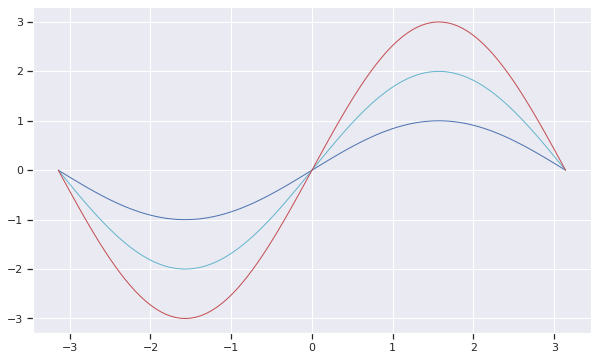

In [ ]:
sns.set(rc={'figure.figsize':(10, 6), "lines.linewidth": 1.0})


# 100 linearly spaced numbers
x = np.linspace(0,1,100)
x = np.linspace(-np.pi,np.pi,100)

# the function
y = x**20
y = np.sin(x)

# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plot the function
#plt.plot(x,y, 'g')
plt.plot(x,y, 'b', label='y=sin(x)')
plt.plot(x,2*y, 'c', label='y=2sin(x)')
plt.plot(x,3*y, 'r', label='y=3sin(x)')

# show the plot
plt.show()

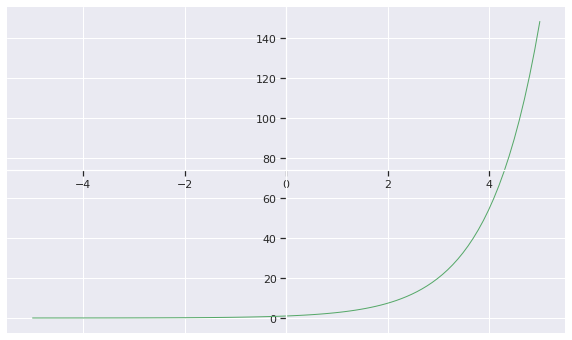

In [ ]:
# 100 linearly spaced numbers
x = np.linspace(-5,5,100)

# the function, which is y = x^3 here
y = x**2
y = np.exp(x)

# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plot the function
plt.plot(x,y, 'g')

# show the plot
plt.show()

##### <font color="blue">*Google*

Three Decades of Activations: A Comprehensive Survey of 400 Activation Functions for Neural Networks offers the most extensive overview of activation functions to date. It aims to streamline the selection process for researchers and practitioners, reducing redundancy and the unintentional rediscovery of functions.

https://arxiv.org/abs/2402.09092


Unifying Large Language Models and Knowledge Graphs: A Roadmap

https://arxiv.org/abs/2306.08302

###### *Google Products*

Vertex AI! 🎉

🔎 You can now query an index from the Vector Search console, making it even easier to validate your retrievals.

🌻 New models have been added to the Model Garden, including Stable Diffusion XL LCM, LLaVA 1.5, PyTorch-ZipNeRF, WizardLM, and more.

🎥 Multimodal Embeddings video support went GA, giving you the possibility to extend your AI applications.

✨ Vertex AI Gemini 1.0 Pro and Gemini 1.0 Pro Vision multimodal language models also went GA!

Overview of multimodal models
https://cloud.google.com/vertex-ai/docs/generative-ai/multimodal/overview

Multimodal video embeddings
https://cloud.google.com/vertex-ai/docs/generative-ai/embeddings/get-multimodal-embeddings#vid-img-txt-request

Vertex AI Vector search
https://cloud.google.com/vertex-ai/docs/vector-search/create-manage-index

https://cloud.google.com/vertex-ai/docs/generative-ai/learn/overview

https://www.linkedin.com/in/deltorobarba/recent-activity/reactions/

![sciences](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_1699.jpeg)

book: Official Google Cloud Certified Professional Machine Learning Engineer Study Guide, https://www.amazon.com/dp/1119944465?ref_=cm_sw_r_mwn_dp_QEQREW6ES28470H5333A&language=en-US

https://www.linkedin.com/pulse/use-mistral-llms-locally-your-computer-lm-studio-windows-molina-ldmje

https://www.linkedin.com/pulse/gemini-look-my-food-give-me-new-ideas-filipe-gracio-phd-tl4be

*Lumiere*

The first generative video goodness of 2024 is in: Lumiere. A text-to-video, image-to-video, and stylized video generation model from Google Research.

Lumiere demonstrates state-of-the-art video generation results with a new model design that facilitates a wide range of content creation tasks such as video editing, video in-painting, and stylized generation.

While existing video models first synthesize distant keyframes then apply temporal super-resolution to make videos look temporally consistent, Lumiere generates the entire temporal duration of the video at once, through a single pass in the model. This makes the videos look more realistic.

Paper: https://lnkd.in/dvcWNCtp
Video: https://lnkd.in/deQHkxFj

###### *Appendix: Models*

*Differentiable Programming and Probabilistic Programming*

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_1701.jpg)

https://www.lokad.com/blog/2024/1/29/probabilistic-exponential-smoothing-for-explainable-ai-in-supply-chain/